### Mushrooms Classification

- This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms. 
- About columns and another details : https://www.kaggle.com/datasets/uciml/mushroom-classification

 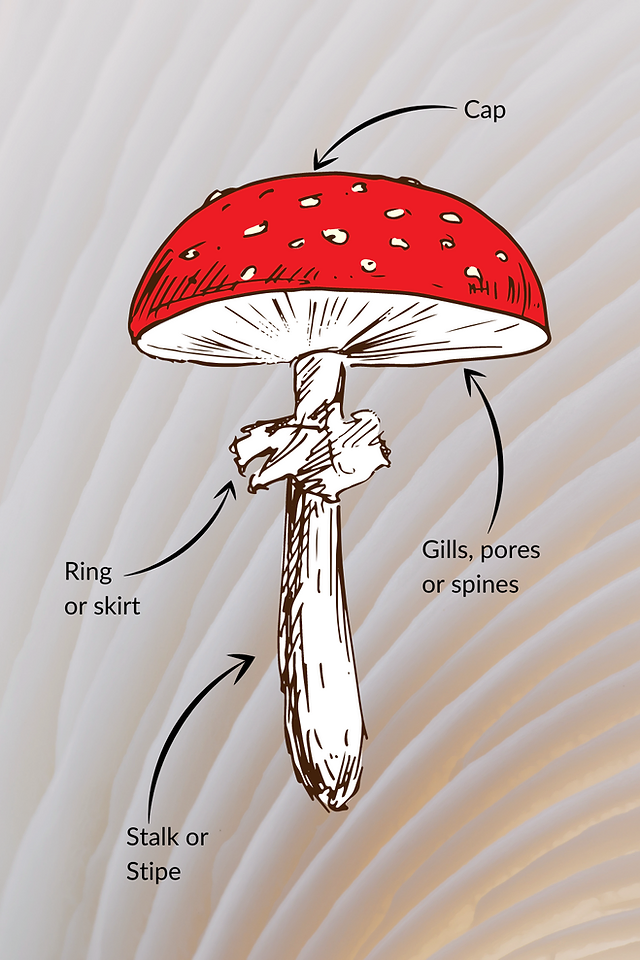

#### 1. Loading Libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.Data Manupulation

In [47]:
df = pd.read_csv("mushrooms.csv")

In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
df.describe().T
#We can see ;
# number of unique values at unique column
#major situation at top column
#frequency of top situation at freq column.

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [52]:
for i in df:
    print(df[i].value_counts())
    print("\n")

class
e    4208
p    3916
Name: count, dtype: int64


cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


bruises
f    4748
t    3376
Name: count, dtype: int64


odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


gill-attachment
f    7914
a     210
Name: count, dtype: int64


gill-spacing
c    6812
w    1312
Name: count, dtype: int64


gill-size
b    5612
n    2512
Name: count, dtype: int64


gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


stalk-shape
t    4608
e    3516
Name: count, dtype: int64


stalk-root
b    3776
?    2480
e    1120
c     55

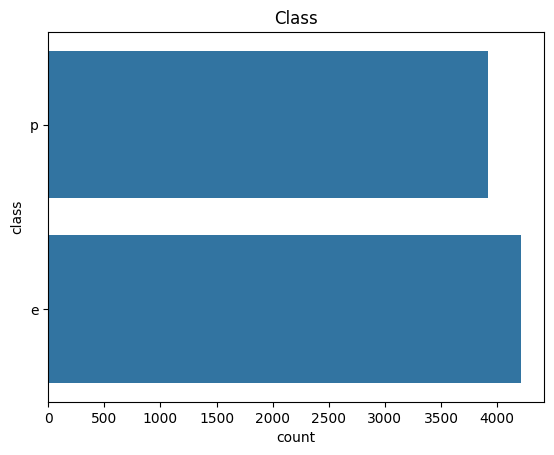

In [53]:
sns.countplot(df["class"])
plt.title("Class")
plt.show()


##### Label Encoder

In [54]:
#Label Encoder for correlation

#from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
ldf = df.apply(lb.fit_transform)

In [55]:
ldf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [56]:
ldf.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [57]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

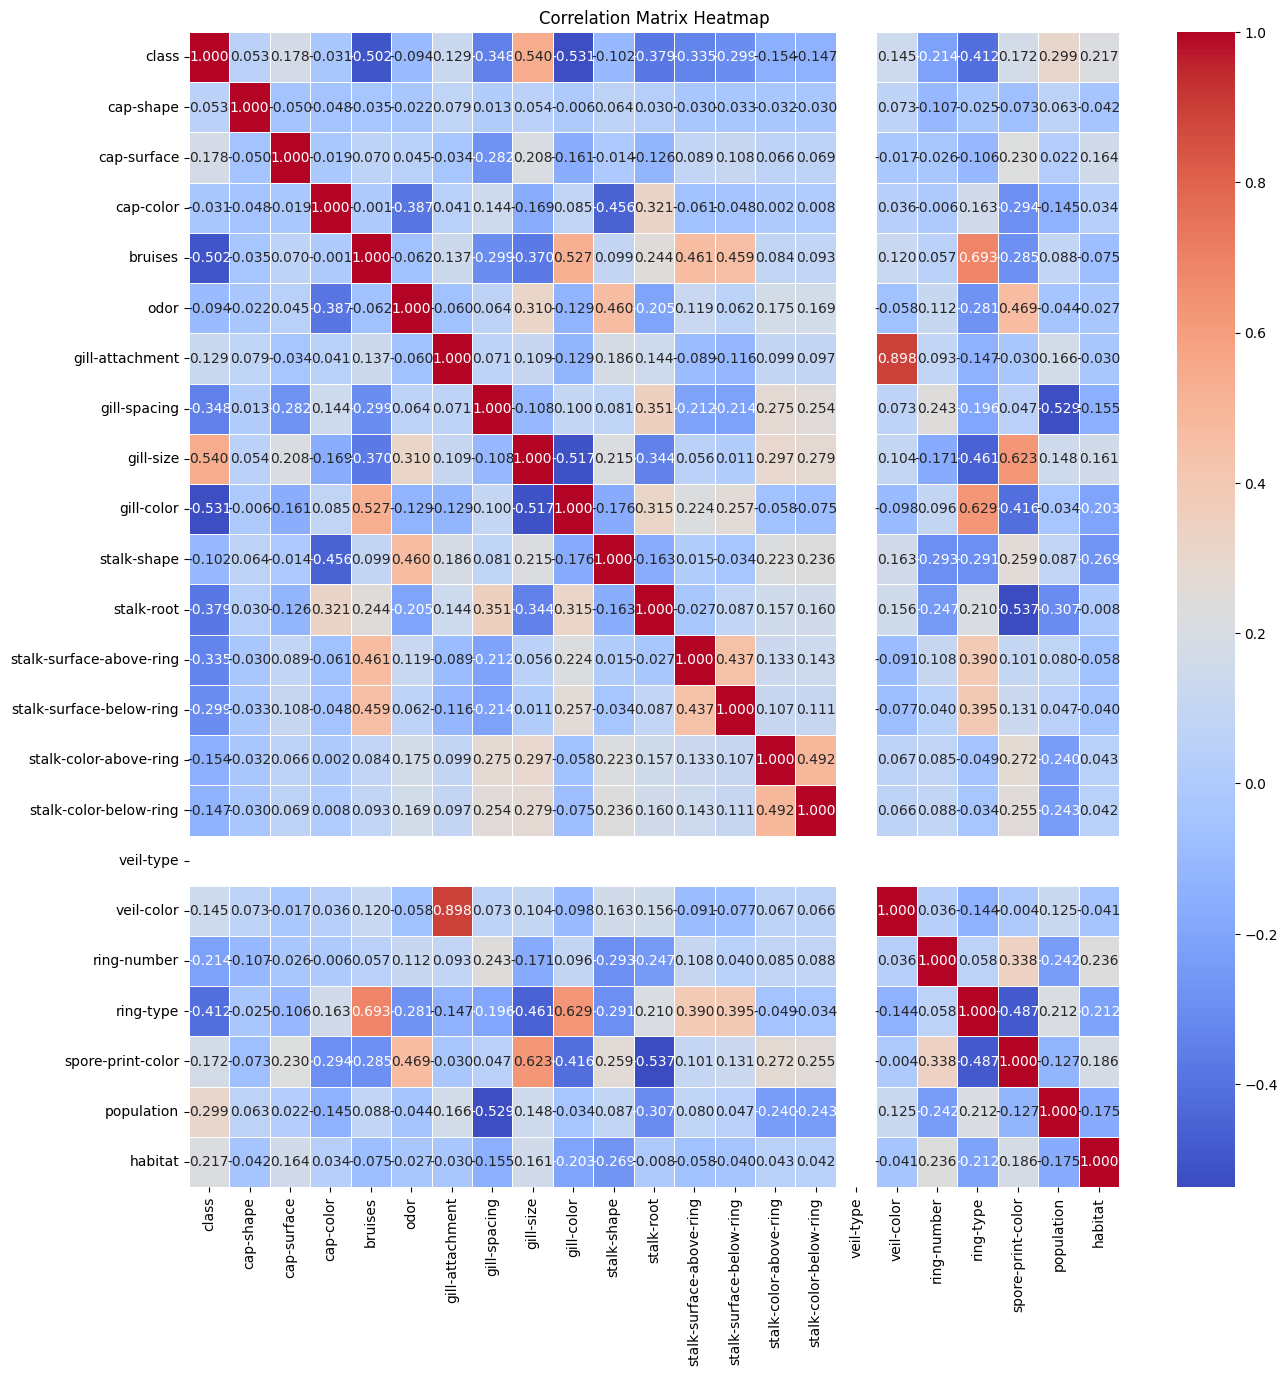

In [58]:
correlation_matrix = ldf.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f')
plt.title("Correlation Matrix Heatmap")
plt.show()

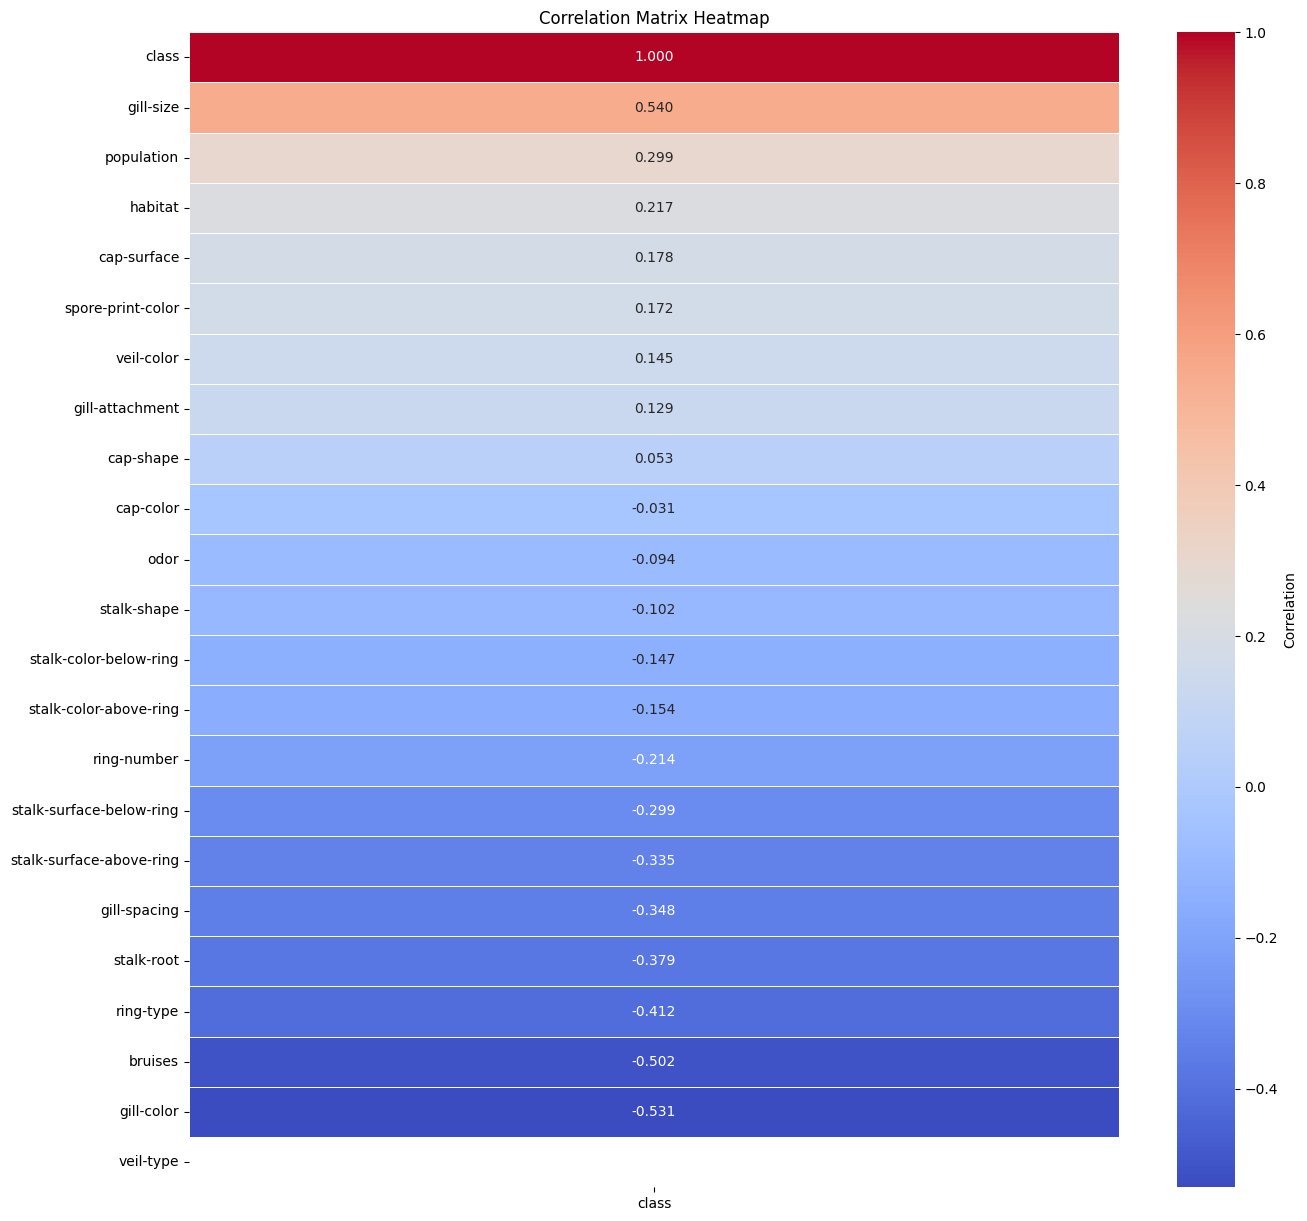

In [59]:

# Assuming correlation_matrix is your correlation matrix and 'target_column' is the column you want to sort by
target_column = 'class'
correlation_matrix = ldf.corr()[[target_column]].sort_values(by=target_column, ascending=False)

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix Heatmap")
plt.show()

#### 3.Visualization



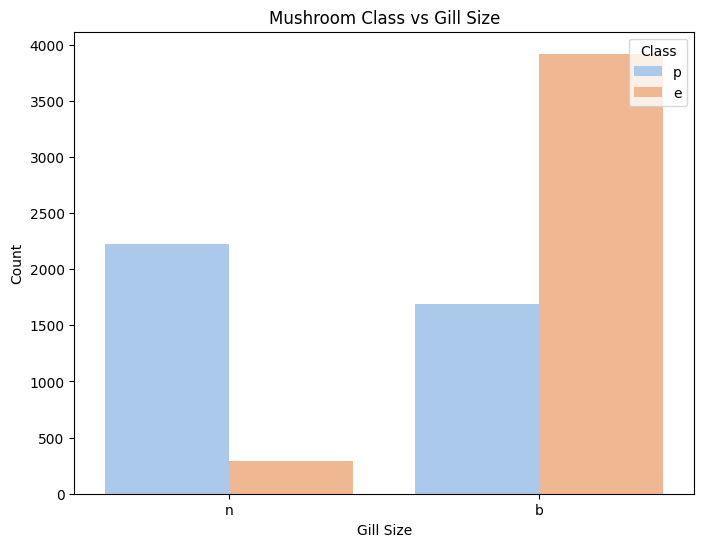

In [60]:
#Class vs Gill-Size
plt.figure(figsize=(8, 6))
sns.countplot(x='gill-size', hue='class', data=df, palette='pastel')

plt.title('Mushroom Class vs Gill Size')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

# classes: edible=e, poisonous=p 
#broad=b,narrow=n

# Output : Broad mushrooms are edible according to the narrow mushrooms, generally.

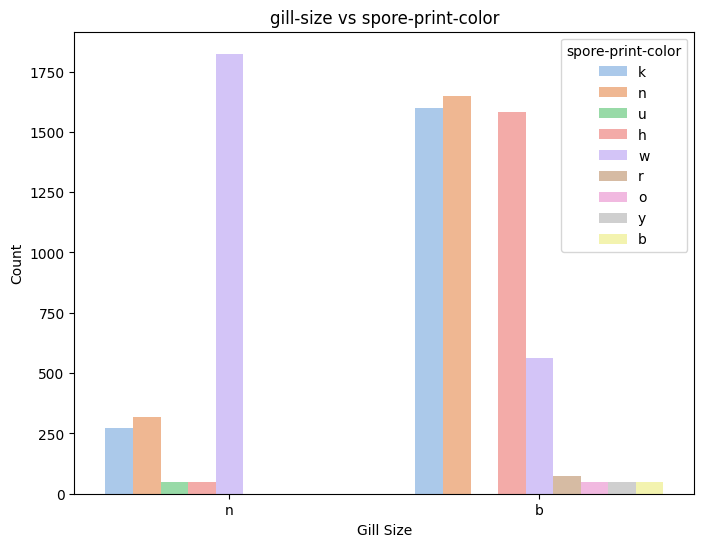

In [61]:
#Class vs Gill-Size
plt.figure(figsize=(8, 6))
sns.countplot(x='gill-size', hue='spore-print-color', data=df, palette='pastel')

plt.title('gill-size vs spore-print-color')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='spore-print-color', loc='upper right')
plt.show()

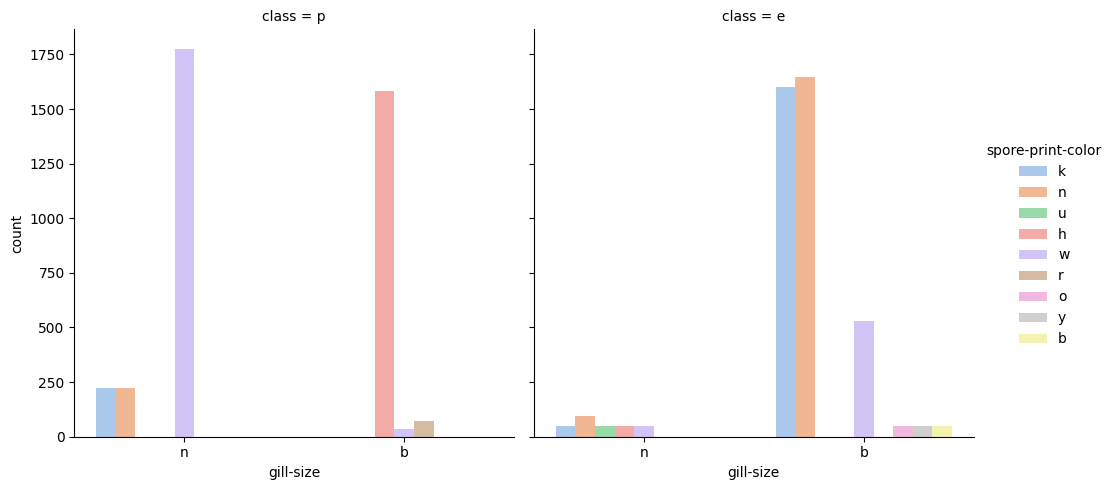

In [62]:
sns.catplot(x='gill-size', hue='spore-print-color', col='class', kind='count', data=df, palette='pastel')

plt.show()

#Output: 
# If mushroom has narrow grill and white spore & broad grill and chocolate(h) spore, probably poisonous(p)
# If mushroom has broad grill and brown(n),black(k) spore, probably edible(e).


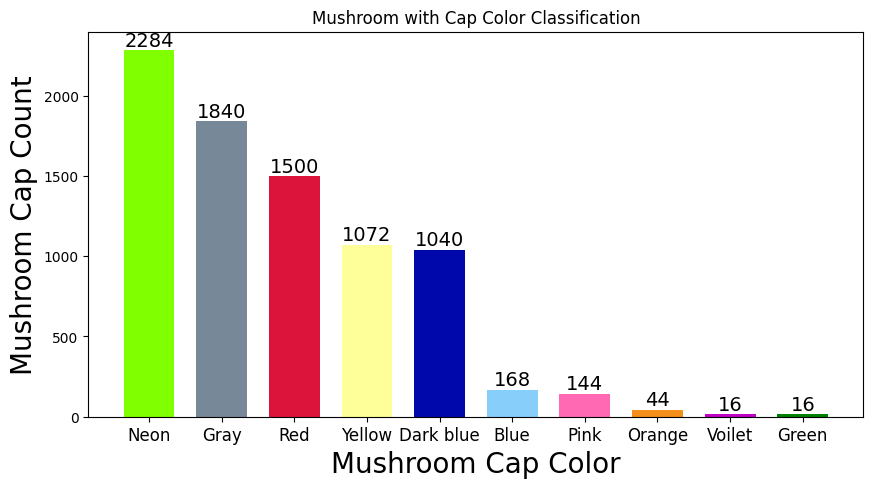

In [63]:
mush_cap = df['cap-color'].value_counts()
m_height = mush_cap.values.tolist() #Provides numerical values on the graph!!!
mush_cap.axes #Provides row labels
mush_cap_labels = mush_cap.axes[0].tolist()
arrange = np.arange(10)
width = 0.7
fig,ax = plt.subplots(figsize=(10,5))
colors =['#7FFF00','#778899','#DC143C','#FFFF99',
        '#0008AC','#87CEFA','#FF69B4','#F38F1A','#C000C5','g']
mush_bar = ax.bar(arrange, m_height , width, color=colors)
ax.set_facecolor('w')
ax.set_xlabel('Mushroom Cap Color',fontsize =20)
ax.set_ylabel('Mushroom Cap Count',fontsize =20)
ax.set_title('Mushroom with Cap Color Classification')
ax.set_xticks(arrange)
ax.set_xticklabels(('Neon','Gray','Red','Yellow','Dark blue','Blue','Pink','Orange','Voilet','Green'),fontsize =12)

# to add labels on the graph
def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mush_bar)

plt.show()

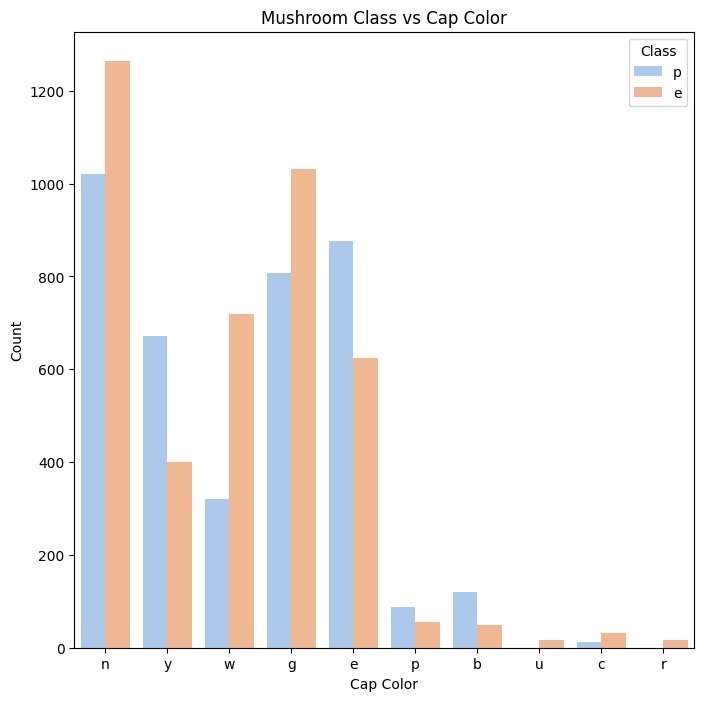

In [64]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 8))
sns.countplot(x='cap-color', hue='class', data=df, palette='pastel')

plt.title('Mushroom Class vs Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

#### KNN Classification

##### 1. Analyze & Normalization
- It should be used to optimize your data.
- Actually I want to choose class but there are 2 situation 1 and 0 at class. So my test accuracy will be high because of overfitting. I will be analyze **cap-color**


In [148]:
# 1 Normalizing & Splitting the Data

# Split the data into features (X) and target (y)
X = ldf.drop("cap-color",axis=1) #independent variables except cap-color
y = ldf["cap-color"] #dependent variable

# from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)



In [149]:
print(X_train.shape)
print(X_test.shape)

(5686, 22)
(2438, 22)


In [150]:
#from sklearn.preprocessing import StandardScaler to normalization
# Scale the features using StandardScaler
scaler = StandardScaler() #Normalization 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Tip : 
- test_size: This parameter determines the proportion of the dataset that will be used for testing the model. In this case, test_size=0.3 means that 20% of the data will be used for testing, and the remaining 80% will be used for training the model. It's a common practice to split the data into training and testing sets to evaluate the model's performance on unseen data.

    - Train Set (Eğitim seti) : Modelin eğitildiği veri kümesidir.

    - Test Set (Test seti) : Bir eğitim kümesinde geliştirilen modeli değerlendirmek için kullanılan bir veri kümesidir.

##### Fitting and Evaluating the Model

- We are now ready to train the model. For this, we’ll use a fixed value of 100 for k.
- We first create an instance of the kNN model, then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [151]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

The model is now trained! We can make predictions on the test dataset, which we can use later to score the model

In [152]:
y_pred = knn.predict(X_test)
y_pred

array([4, 2, 8, ..., 4, 4, 2])

##### Accuracy

In [153]:
# from sklearn.metrics import accuracy_score : 
accuracy = accuracy_score(y_test, y_pred)
print("Test set Accuracy:", accuracy)

Test set Accuracy: 0.280557834290402


##### Using Cross Validation to Get the Best Value of k

In [177]:
k_values = [i for i in range (1,20)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

# from sklearn.model_selection import cross_val_score  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3)
    scores.append(np.mean(score))

**cv**: The cross-validation is performed with cv count folds.If we say cv=4;
-  meaning the dataset is divided into 4 parts, and the model is trained and tested four times, each time using a different fold as the test set and the remaining three folds as the training set.

##### Plot

Text(0, 0.5, 'Accuracy Score')

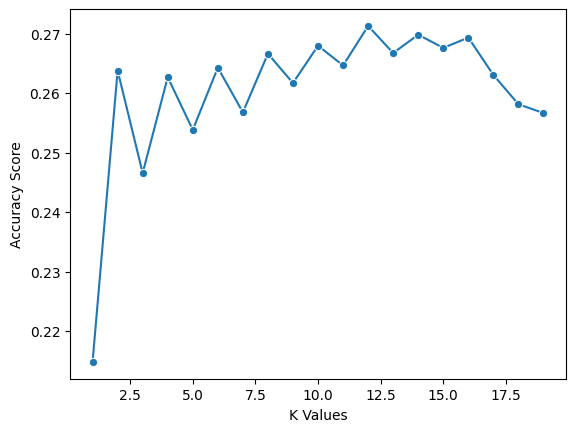

In [178]:
# We can plot the results with the following code
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [179]:
scores_max=np.max(scores)
k_values_max=np.argmax(scores)

# 'list' object has no attribute 'argmax' so ı create array previous step of the max k and accuracy calculation

**Argmax**:argmax function simply returns the index of the maximum value in the array

In [180]:
print( "The best accuracy", scores_max, "with k=", k_values_max+1)
# 'list' object has no attribute 'argmax'

The best accuracy 0.2712949286065977 with k= 12
